Lab work №3

Student name - Khrystyna

Student surname - Zyryanova

Group - CS-32

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import make_moons

In [15]:
# Функція для побудови decision boundary
def plot_classifier_boundary(X, y, model=None, title=None, resolution=300):
    plt.style.use('seaborn-v0_8-pastel')

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, resolution),
        np.linspace(y_min, y_max, resolution)
    )

    if model is not None:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3)

    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="deep", s=40, edgecolor="black")
    if title:
        plt.title(title, fontsize=14)
    plt.show()

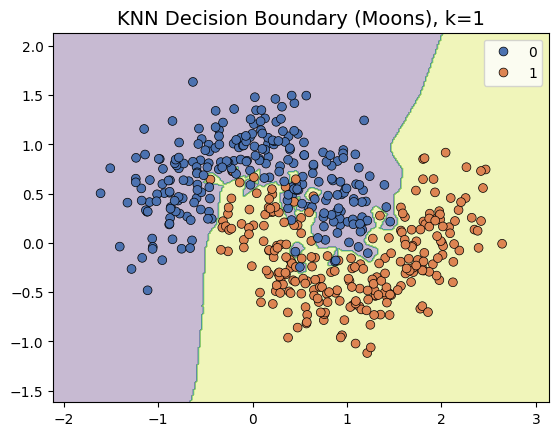

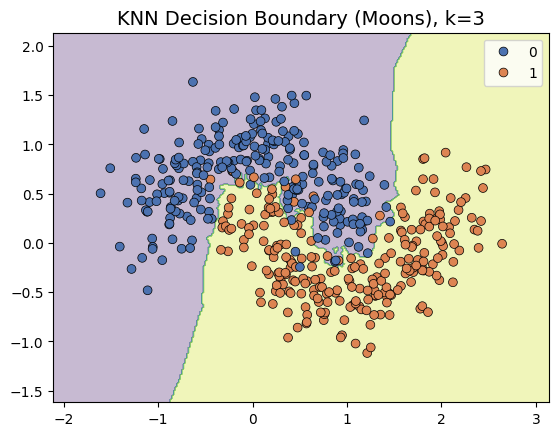

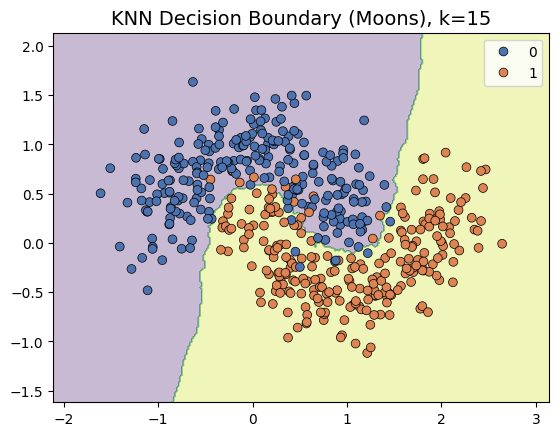

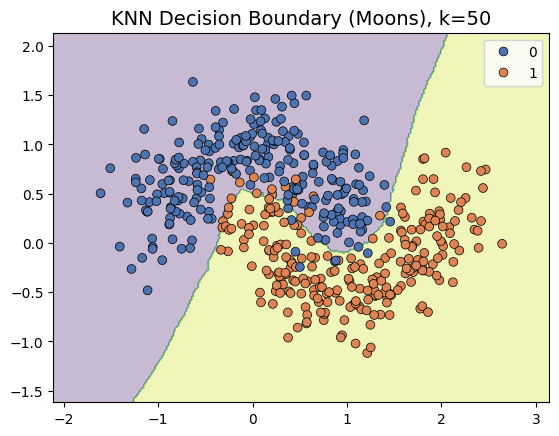

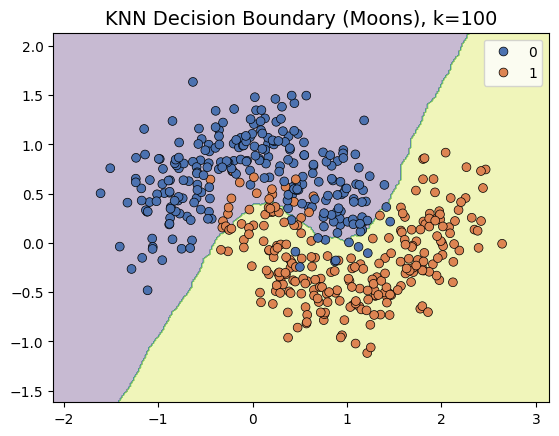

In [16]:
# Toy Example - Moons
X_moons, y_moons = make_moons(n_samples=500, noise=0.25, random_state=42)


# Тестування різних k:

for k in [1, 3, 15, 50, 100]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_moons, y_moons)

    plot_classifier_boundary(
        X_moons, y_moons, model,
        title=f"KNN Decision Boundary (Moons), k={k}"
    )

In [18]:
df = pd.read_csv("archive/Star3642_balanced.csv")

df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


In [20]:
# Підготовка ознак
X = df.drop("TargetClass", axis=1)
y = df["TargetClass"]

# Категоріальні ознаки: LabelEncoder
from sklearn.preprocessing import LabelEncoder

for col in X.columns:
    if X[col].dtype == "object":
        X[col] = LabelEncoder().fit_transform(X[col])

y = LabelEncoder().fit_transform(y)

# Масштабування
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
# Поділ на train / test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [22]:
# Експеримент 1 — різні метрики
metrics = ["euclidean", "manhattan", "chebyshev", "minkowski"]

results_metrics = []

for metric in metrics:
    model = KNeighborsClassifier(n_neighbors=5, metric=metric)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average="macro")

    results_metrics.append((metric, acc, f1))

results_df = pd.DataFrame(results_metrics, columns=["metric", "accuracy", "f1_macro"])
results_df

,metric,accuracy,f1_macro
0,euclidean,0.888035,0.888032
1,manhattan,0.891328,0.891320
2,chebyshev,0.894621,0.894615
3,minkowski,0.888035,0.888032


In [23]:
# Експеримент 2 — різний k
k_values = [1, 3, 5, 7, 15, 25, 50, 75]

acc_list = []
f1_list = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc_list.append(accuracy_score(y_test, preds))
    f1_list.append(f1_score(y_test, preds, average="macro"))

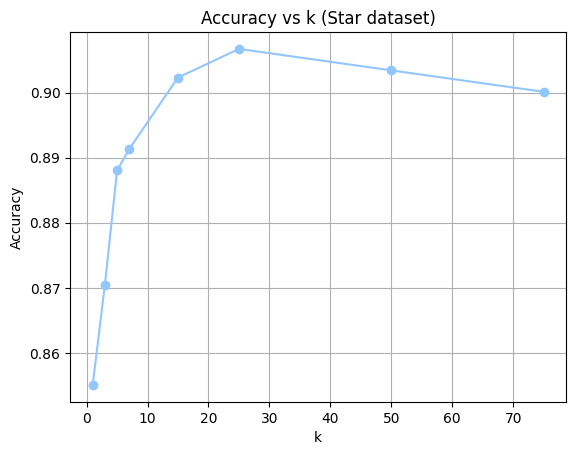

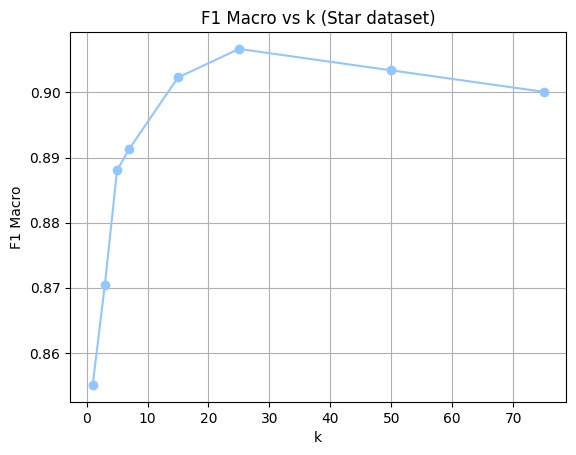

In [24]:
# Порівняння
plt.plot(k_values, acc_list, marker="o")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k (Star dataset)")
plt.grid(True)
plt.show()

plt.plot(k_values, f1_list, marker="o")
plt.xlabel("k")
plt.ylabel("F1 Macro")
plt.title("F1 Macro vs k (Star dataset)")
plt.grid(True)
plt.show()

In [25]:
# Експеримент 3 — різний % запам'ятованих даних
percentages = [5, 10, 20, 30, 50, 70, 90, 100]
acc_mem = []
f1_mem = []

for p in percentages:
    size = int(len(X_train) * (p / 100))
    
    X_small = X_train[:size]
    y_small = y_train[:size]

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_small, y_small)
    
    preds = model.predict(X_test)
    acc_mem.append(accuracy_score(y_test, preds))
    f1_mem.append(f1_score(y_test, preds, average="macro"))

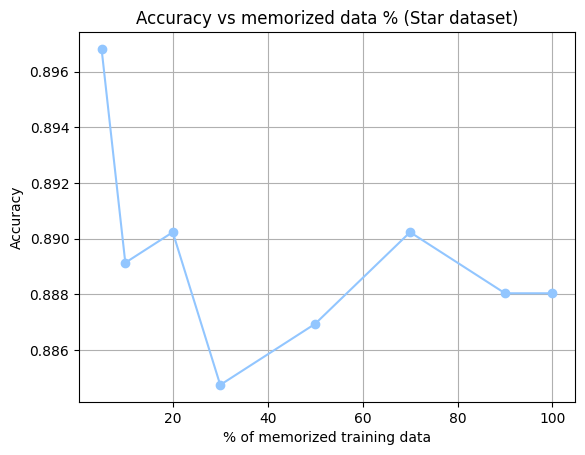

In [26]:
# Графік
plt.plot(percentages, acc_mem, marker="o")
plt.xlabel("% of memorized training data")
plt.ylabel("Accuracy")
plt.title("Accuracy vs memorized data % (Star dataset)")
plt.grid(True)
plt.show()

Висновки:

У лабораторній роботі було виконано класифікацію даних Star3642_balanced.csv за допомогою кількох алгоритмів. Після масштабування ознак та тренування моделей отримано такі результати:

1. SVM з RBF-ядром показав найкращий F1-score і найточнішу межу класифікації.

2. Random Forest також продемонстрував високу якість і стійкість до шуму.

3. kNN дав середній результат і сильно залежить від вибору параметра k.

4. Логістична регресія працює гірше на нелінійних даних, бо може будувати лише лінійні кордони.